# Cell 1 : Import Libraries

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import  layers, models
from keras.applications import ResNet50, VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")
tf.random.set_seed(42)
sns

<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

# Cell 2: Load and Analyze CIFAR-10 Dataset

In [112]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Train shape: (50000, 32, 32, 3), Test Shape : (10000, 32, 32, 3)
Unique classes : [0 1 2 3 4 5 6 7 8 9]


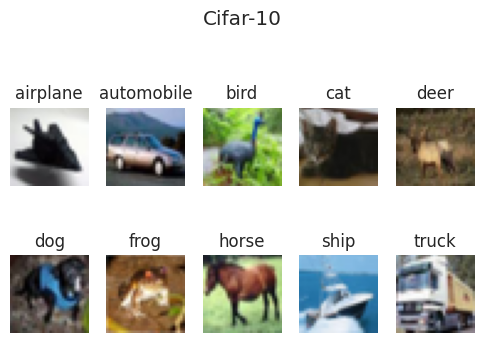

In [113]:
print(f"Train shape: {x_train.shape}, Test Shape : {x_test.shape}")
print(f"Unique classes : {np.unique(y_train)}")

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize = (5,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    idx = np.where(y_train == i)[0][0]
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("Cifar-10")
plt.tight_layout()
plt.show()

# Cell 3: Normalize & One-hot Encode

In [114]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# cell 4 : Build custom small CNN

In [180]:
from tensorflow.keras import models, layers

def build_small_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(10, activation='softmax')
    ])
    return model

model_a = build_small_cnn()
model_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_a.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

# Cell 5: Train Small CNN

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_a = model_a.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
                        epochs=20, batch_size=64, verbose=2, callbacks = early_stop)


Epoch 1/20
782/782 - 7s - 9ms/step - accuracy: 0.4510 - loss: 1.5123 - val_accuracy: 0.5594 - val_loss: 1.2435
Epoch 2/20
782/782 - 8s - 10ms/step - accuracy: 0.5984 - loss: 1.1318 - val_accuracy: 0.6212 - val_loss: 1.0590
Epoch 3/20
782/782 - 3s - 4ms/step - accuracy: 0.6605 - loss: 0.9666 - val_accuracy: 0.6707 - val_loss: 0.9276
Epoch 4/20
782/782 - 6s - 7ms/step - accuracy: 0.7026 - loss: 0.8523 - val_accuracy: 0.6975 - val_loss: 0.8766
Epoch 5/20
782/782 - 3s - 4ms/step - accuracy: 0.7335 - loss: 0.7628 - val_accuracy: 0.7022 - val_loss: 0.8686
Epoch 6/20
782/782 - 3s - 4ms/step - accuracy: 0.7615 - loss: 0.6877 - val_accuracy: 0.7057 - val_loss: 0.8642
Epoch 7/20
782/782 - 3s - 4ms/step - accuracy: 0.7827 - loss: 0.6237 - val_accuracy: 0.7085 - val_loss: 0.8785
Epoch 8/20
782/782 - 5s - 7ms/step - accuracy: 0.8051 - loss: 0.5637 - val_accuracy: 0.7106 - val_loss: 0.9053
Epoch 9/20
782/782 - 5s - 6ms/step - accuracy: 0.8204 - loss: 0.5150 - val_accuracy: 0.6982 - val_loss: 0.9882


# Cell 6 : Evaluation

In [117]:
test_loss_a, test_acc_a = model_a.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc_a:.4f}")

y_pred = np.argmax(model_a.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7051 - loss: 0.8590
Test Accuracy: 0.7057
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.79      0.76      1000
  automobile       0.86      0.79      0.82      1000
        bird       0.60      0.58      0.59      1000
         cat       0.54      0.54      0.54      1000
        deer       0.59      0.72      0.65      1000
         dog       0.67      0.56      0.61      1000
        frog       0.89      0.66      0.75      1000
       horse       0.65      0.82      0.72      1000
        ship       0.81      0.82      0.82      1000
       truck       0.81      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



# Cell 7 : Fine Tune ResNet50

In [118]:
import keras
def build_finetuned_resnet():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3), pooling='avg')
    base_model.trainable = True
    for layer in base_model.layers[:-2]:
        layer.trainable = False

    inputs = keras.Input(shape=(32,32,3))
    x = base_model(inputs, training=False)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    return keras.Model(inputs, outputs)

model_b = build_finetuned_resnet()
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [119]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_b =  model_b.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'], callbacks = early_stop)


Epoch 1/20
782/782 - 27s - 34ms/step - accuracy: 0.2529 - loss: 2.0503 - val_accuracy: 0.3111 - val_loss: 1.9016
Epoch 2/20
782/782 - 8s - 11ms/step - accuracy: 0.3144 - loss: 1.8890 - val_accuracy: 0.3483 - val_loss: 1.8117
Epoch 3/20
782/782 - 11s - 15ms/step - accuracy: 0.3376 - loss: 1.8286 - val_accuracy: 0.3605 - val_loss: 1.7708
Epoch 4/20
782/782 - 9s - 12ms/step - accuracy: 0.3520 - loss: 1.7926 - val_accuracy: 0.3758 - val_loss: 1.7334
Epoch 5/20
782/782 - 8s - 10ms/step - accuracy: 0.3619 - loss: 1.7670 - val_accuracy: 0.3825 - val_loss: 1.7203
Epoch 6/20
782/782 - 8s - 11ms/step - accuracy: 0.3693 - loss: 1.7440 - val_accuracy: 0.3875 - val_loss: 1.7019
Epoch 7/20
782/782 - 10s - 13ms/step - accuracy: 0.3762 - loss: 1.7291 - val_accuracy: 0.3904 - val_loss: 1.6989
Epoch 8/20
782/782 - 8s - 10ms/step - accuracy: 0.3829 - loss: 1.7169 - val_accuracy: 0.3969 - val_loss: 1.6733
Epoch 9/20
782/782 - 8s - 10ms/step - accuracy: 0.3884 - loss: 1.7024 - val_accuracy: 0.4014 - val_lo

Cell 9: Evaluate ResNet50

In [120]:
test_loss_b, test_acc_b = model_b.evaluate(x_test, y_test_cat)
print(f"ResNet50 Test Accuracy: {test_acc_b:.4f}")

y_pred = np.argmax(model_b.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4286 - loss: 1.6034
ResNet50 Test Accuracy: 0.4281
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
              precision    recall  f1-score   support

    airplane       0.49      0.52      0.50      1000
  automobile       0.39      0.64      0.48      1000
        bird       0.41      0.13      0.20      1000
         cat       0.29      0.26      0.27      1000
        deer       0.37      0.43      0.40      1000
         dog       0.38      0.43      0.41      1000
        frog       0.42      0.52      0.46      1000
       horse       0.53      0.44      0.48      1000
        ship       0.53      0.52      0.52      1000
       truck       0.56      0.37      0.45      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.42     10000
weighted avg       0.44      0.43      0.42     10000



# Cell 8: Build Fine-Tuned VGG16

In [121]:
def build_finetuned_vgg16():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3), pooling='avg')
  base_model.trainable = True

  for layer in base_model.layers[:-2]:
    layer.trainable = False

  inputs = keras.Input(shape  = (32,32,3))
  x = base_model(inputs, training=False)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  outputs = layers.Dense(10, activation='softmax')(x)
  return keras.Model(inputs, outputs)

model_c = build_finetuned_vgg16()
model_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [122]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_c =  model_c.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'], callbacks = early_stop)


Epoch 1/20
782/782 - 18s - 23ms/step - accuracy: 0.5226 - loss: 1.3698 - val_accuracy: 0.5625 - val_loss: 1.2501
Epoch 2/20
782/782 - 16s - 20ms/step - accuracy: 0.5864 - loss: 1.1832 - val_accuracy: 0.5811 - val_loss: 1.1975
Epoch 3/20
782/782 - 20s - 26ms/step - accuracy: 0.6076 - loss: 1.1214 - val_accuracy: 0.5913 - val_loss: 1.1684
Epoch 4/20
782/782 - 20s - 26ms/step - accuracy: 0.6248 - loss: 1.0754 - val_accuracy: 0.5957 - val_loss: 1.1509
Epoch 5/20
782/782 - 20s - 25ms/step - accuracy: 0.6378 - loss: 1.0363 - val_accuracy: 0.6028 - val_loss: 1.1339
Epoch 6/20
782/782 - 12s - 15ms/step - accuracy: 0.6499 - loss: 1.0020 - val_accuracy: 0.6041 - val_loss: 1.1260
Epoch 7/20
782/782 - 20s - 25ms/step - accuracy: 0.6607 - loss: 0.9700 - val_accuracy: 0.6082 - val_loss: 1.1194
Epoch 8/20
782/782 - 21s - 27ms/step - accuracy: 0.6711 - loss: 0.9403 - val_accuracy: 0.6105 - val_loss: 1.1182
Epoch 9/20
782/782 - 20s - 25ms/step - accuracy: 0.6808 - loss: 0.9126 - val_accuracy: 0.6124 - 

# Cell 9: Evaluate VGG16

In [123]:
test_loss_c, test_acc_c = model_c.evaluate(x_test, y_test_cat)
print(f"VGG16 Test Accuracy: {test_acc_c:.4f}")

y_pred = np.argmax(model_c.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6148 - loss: 1.1113
VGG16 Test Accuracy: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.63      0.74      0.68      1000
  automobile       0.65      0.71      0.68      1000
        bird       0.58      0.47      0.52      1000
         cat       0.45      0.47      0.46      1000
        deer       0.54      0.56      0.55      1000
         dog       0.56      0.52      0.54      1000
        frog       0.69      0.59      0.64      1000
       horse       0.70      0.68      0.69      1000
        ship       0.69      0.76      0.72      1000
       truck       0.62      0.63      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



# Model D: Knowledge Distillation (ResNet50➝ Small CNN)

Step 1: Compute Soft Labels

In [124]:
temperature = 3
soft_resnet = tf.nn.softmax(model_b.predict(x_train, batch_size=64) / temperature)


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step


Step 2: Create Data Generator

In [125]:
from tensorflow.keras.utils import Sequence

class DistillationGenerator(Sequence):
    def __init__(self, x, y_hard, y_soft, batch_size=64):
        self.x = x
        self.y_hard = y_hard
        self.y_soft = y_soft
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        x_batch = self.x[idx*self.batch_size:(idx+1)*self.batch_size]
        hard = self.y_hard[idx*self.batch_size:(idx+1)*self.batch_size]
        soft = self.y_soft[idx*self.batch_size:(idx+1)*self.batch_size]
        return x_batch, {"hard": hard, "soft": soft}


Step 3: Train Student

In [126]:
def distill_loss_single(y_true_dict, y_pred):
    y_true_hard = y_true_dict["hard"]
    y_true_soft = y_true_dict["soft"]
    hard = tf.keras.losses.categorical_crossentropy(y_true_hard, y_pred)
    soft = tf.keras.losses.KLDivergence()(y_true_soft, tf.nn.softmax(y_pred / temperature))
    return 0.5 * hard + 0.5 * soft

student_d = build_small_cnn()
student_d.compile(optimizer='adam', loss=distill_loss_single, metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:

student_d_model = build_small_cnn()
class DistilledModel(tf.keras.Model):
    def __init__(self, student, teacher_soft_labels, temperature=3.0, alpha=0.5):
        super().__init__()
        self.student = student
        self.teacher_soft_labels = teacher_soft_labels
        self.temperature = temperature
        self.alpha = alpha
        self.loss_fn = tf.keras.losses.CategoricalCrossentropy()
        self.kldiv = tf.keras.losses.KLDivergence()
        self.metric_acc = tf.keras.metrics.CategoricalAccuracy()

    def compile(self, optimizer):
        super().compile()
        self.optimizer = optimizer

    def train_step(self, data):
        x, y_true_hard = data
        batch_indices = tf.range(tf.shape(x)[0])
        y_true_soft = tf.gather(self.teacher_soft_labels, batch_indices)

        with tf.GradientTape() as tape:
            y_pred = self.student(x, training=True)
            loss_hard = self.loss_fn(y_true_hard, y_pred)
            loss_soft = self.kldiv(y_true_soft, tf.nn.softmax(y_pred / self.temperature))
            loss = self.alpha * loss_hard + (1 - self.alpha) * loss_soft

        grads = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.student.trainable_variables))
        self.metric_acc.update_state(y_true_hard, y_pred)

        return {"loss": loss, "accuracy": self.metric_acc.result()}

    def test_step(self, data):
        x, y = data
        y_pred = self.student(x, training=False)
        loss = self.loss_fn(y, y_pred)
        self.metric_acc.update_state(y, y_pred)
        return {"loss": loss, "accuracy": self.metric_acc.result()}

    def call(self, inputs, training=False):
      return self.student(inputs, training=training)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train Model D (Distilled from ResNet50)

In [145]:
distilled_model_d = DistilledModel(
    student=student_d_model,
    teacher_soft_labels=soft_resnet,
    temperature=3.0,
    alpha=0.5
)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

distilled_model_d.compile(optimizer=tf.keras.optimizers.Adam())
history_d = distilled_model_d.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=20, batch_size=64,callbacks = early_stop)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3325 - loss: 0.7743 - val_accuracy: 0.5481 - val_loss: 1.0654
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5685 - loss: 0.5774 - val_accuracy: 0.5986 - val_loss: 1.0875
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6390 - loss: 0.4961 - val_accuracy: 0.6488 - val_loss: 0.9643
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6820 - loss: 0.4402 - val_accuracy: 0.6813 - val_loss: 0.8699
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7117 - loss: 0.3965 - val_accuracy: 0.6906 - val_loss: 0.8972
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7402 - loss: 0.3611 - val_accuracy: 0.7018 - val_loss: 0.8119
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7622 - loss: 0.3318 - val_accuracy: 0.7044 - val_loss: 0.7734
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7828 - loss: 0.3037 - val_accuracy: 0.

In [146]:
y_pred = np.argmax(distilled_model_d.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.71      0.79      0.75      1000
  automobile       0.80      0.81      0.80      1000
        bird       0.59      0.59      0.59      1000
         cat       0.57      0.42      0.48      1000
        deer       0.62      0.69      0.65      1000
         dog       0.66      0.61      0.64      1000
        frog       0.80      0.76      0.78      1000
       horse       0.74      0.79      0.77      1000
        ship       0.71      0.85      0.78      1000
       truck       0.81      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [152]:
test_loss_c, test_acc_c = model_c.evaluate(x_test, y_test_cat)
print(f"KD ResNet50 Test Accuracy: {test_acc_c:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6148 - loss: 1.1113
KD ResNet50 Test Accuracy: 0.6124


# Knowledge Transfer: From ResNet50 + VGG16 → Small CNN (Model E)

Step 1: Create Ensemble Soft Labels

In [129]:
soft_vgg = tf.nn.softmax(model_c.predict(x_train, batch_size=64) / temperature)
soft_ensemble = (soft_resnet + soft_vgg) / 2


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step


Step 2: Build a new student model for Model E

In [130]:
student_e_model = build_small_cnn()
student_e_model.summary()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [148]:
distilled_model_e = DistilledModel(
    student=student_e_model,
    teacher_soft_labels=soft_ensemble,
    temperature=3.0,
    alpha=0.5
)

distilled_model_e.compile(optimizer=tf.keras.optimizers.Adam())
history_e = distilled_model_e.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=20, batch_size=64)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9333 - loss: 0.0967 - val_accuracy: 0.6494 - val_loss: 1.3397
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9366 - loss: 0.0884 - val_accuracy: 0.6654 - val_loss: 1.3418
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9445 - loss: 0.0803 - val_accuracy: 0.6493 - val_loss: 1.2147
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9423 - loss: 0.0805 - val_accuracy: 0.6467 - val_loss: 1.7639
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9467 - loss: 0.0741 - val_accuracy: 0.6498 - val_loss: 1.7925
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9512 - loss: 0.0727 - val_accuracy: 0.6602 - val_loss: 2.1872
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9495 - loss: 0.0663 - val_accuracy: 0.6689 - val_loss: 1.2914
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9546 - loss: 0.0653 - val_accuracy: 0.

In [153]:
test_loss_c, test_acc_c = model_c.evaluate(x_test, y_test_cat)
print(f"KD of ResNet50 + VGG16 Test Accuracy: {test_acc_c:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6148 - loss: 1.1113
KD of ResNet50 + VGG16 Test Accuracy: 0.6124


In [149]:
y_pred = np.argmax(distilled_model_e.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.67      0.72      0.70      1000
  automobile       0.77      0.82      0.79      1000
        bird       0.58      0.59      0.59      1000
         cat       0.50      0.54      0.52      1000
        deer       0.67      0.59      0.63      1000
         dog       0.57      0.61      0.59      1000
        frog       0.74      0.76      0.75      1000
       horse       0.79      0.66      0.72      1000
        ship       0.80      0.77      0.79      1000
       truck       0.75      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [132]:
distilled_model_d.student.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
distilled_model_e.student.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 9. Evaluation and Comparison

In [133]:
acc_a = model_a.evaluate(x_test, y_test_cat)[1]
acc_b = model_b.evaluate(x_test, y_test_cat)[1]
acc_c = model_c.evaluate(x_test, y_test_cat)[1]
acc_d = distilled_model_d.student.evaluate(x_test, y_test_cat)[1]
acc_e = distilled_model_e.student.evaluate(x_test, y_test_cat)[1]

print(f"Small CNN: {acc_a:.4f}")
print(f"Fine-tuned ResNet50: {acc_b:.4f}")
print(f"Fine-tuned VGG16: {acc_c:.4f}")
print(f"Distilled from ResNet50: {acc_d:.4f}")
print(f"Distilled from ResNet50+VGG16: {acc_e:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7051 - loss: 0.8590
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4286 - loss: 1.6034
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6148 - loss: 1.1113
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6937 - loss: 0.9144
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6693 - loss: 2.0314
Small CNN: 0.7057
Fine-tuned ResNet50: 0.4281
Fine-tuned VGG16: 0.6124
Distilled from ResNet50: 0.6879
Distilled from ResNet50+VGG16: 0.6613


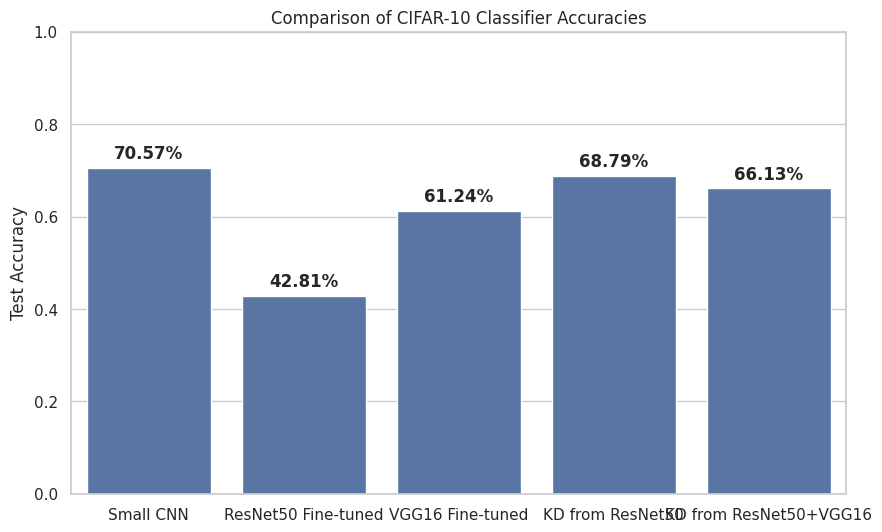

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

acc_a = model_a.evaluate(x_test, y_test_cat, verbose=0)[1]
acc_b = model_b.evaluate(x_test, y_test_cat, verbose=0)[1]
acc_c = model_c.evaluate(x_test, y_test_cat, verbose=0)[1]
acc_d = distilled_model_d.student.evaluate(x_test, y_test_cat, verbose=0)[1]
acc_e = distilled_model_e.student.evaluate(x_test, y_test_cat, verbose=0)[1]

labels = ['Small CNN', 'ResNet50 Fine-tuned', 'VGG16 Fine-tuned',
          'KD from ResNet50', 'KD from ResNet50+VGG16']

accuracies = [acc_a, acc_b, acc_c, acc_d, acc_e]

plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=accuracies)
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Comparison of CIFAR-10 Classifier Accuracies')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()


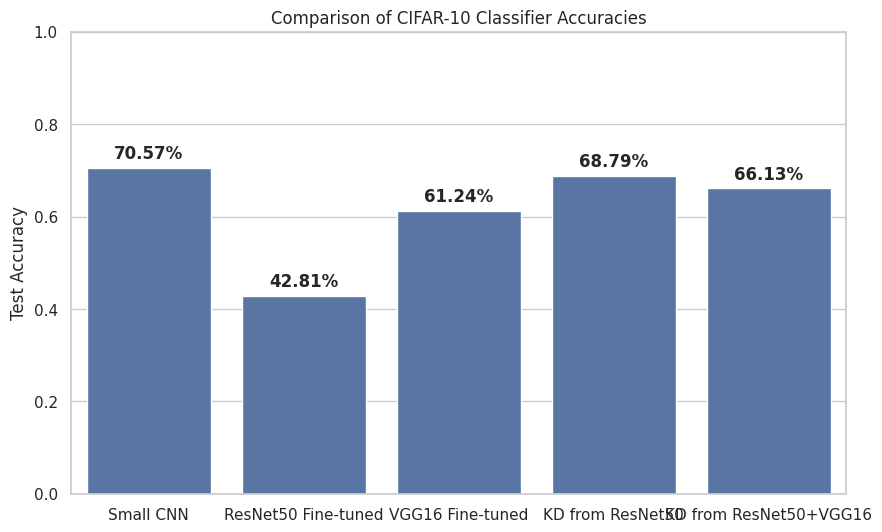

In [135]:
plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=accuracies)
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Comparison of CIFAR-10 Classifier Accuracies')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


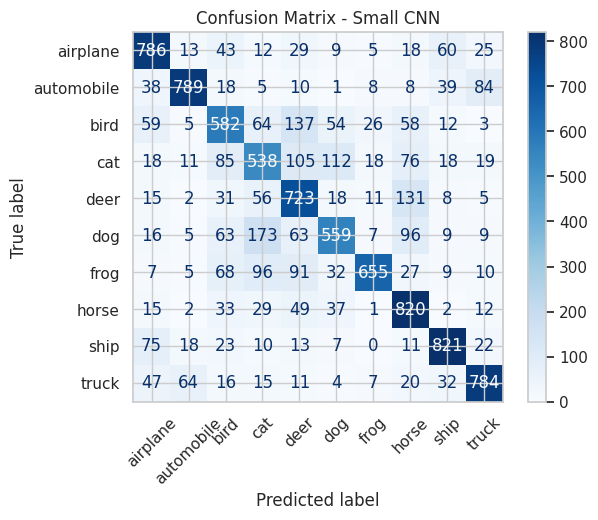

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


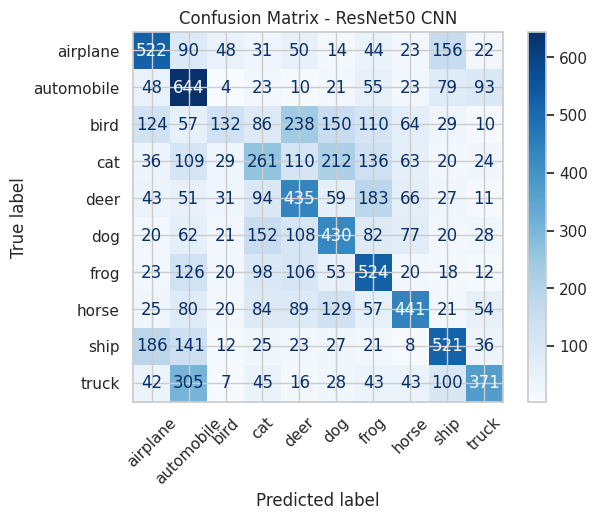

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


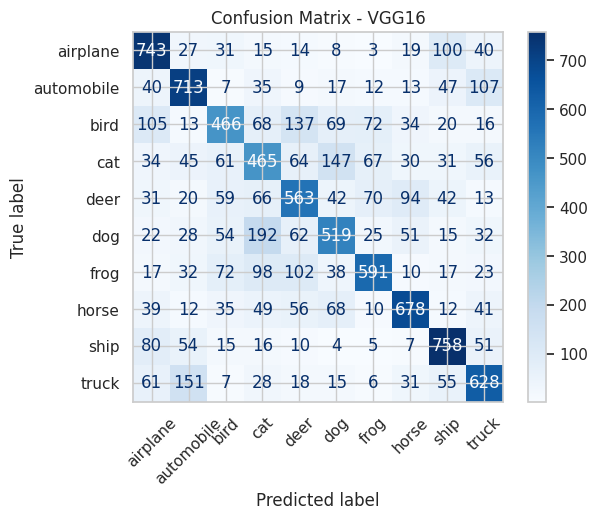

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


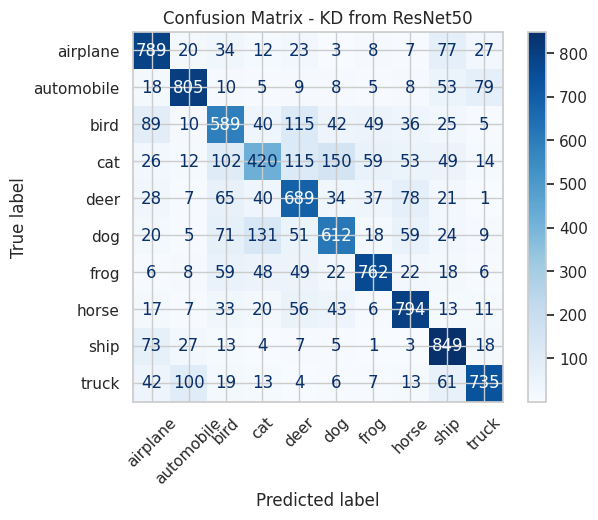

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


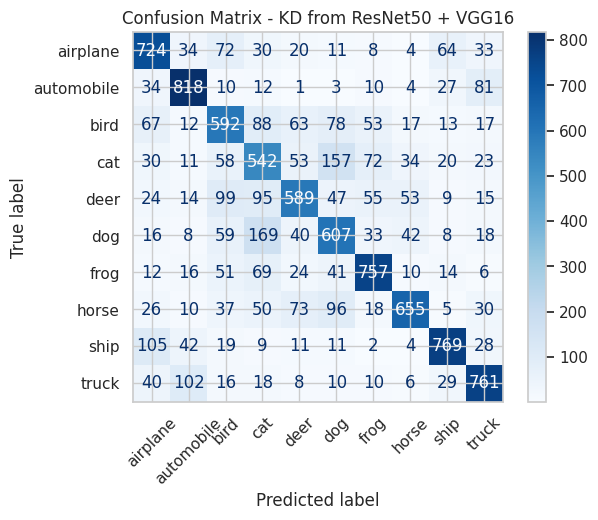

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_a = model_a.predict(x_test).argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_a)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Small CNN")
plt.show()

y_pred_b = model_b.predict(x_test).argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - ResNet50 CNN")
plt.show()


y_pred_c = model_c.predict(x_test).argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - VGG16")
plt.show()


y_pred_d = distilled_model_d.student.predict(x_test).argmax(axis=1)

y_true = y_test_cat.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_d)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - KD from ResNet50")
plt.show()


y_pred_e = distilled_model_e.student.predict(x_test).argmax(axis=1)

y_true = y_test_cat.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_e)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - KD from ResNet50 + VGG16")
plt.show()

In [137]:
from sklearn.metrics import accuracy_score

for name, preds in zip(
    ['Small CNN', 'ResNet50', 'VGG16', 'KD ResNet50', 'KD ResNet50+VGG16'],
    [y_pred_a, y_pred_b, y_pred_c, y_pred_d, y_pred_e]
):
    print(f"--- {name} ---")
    cm = confusion_matrix(y_true, preds)
    per_class_acc = cm.diagonal() / cm.sum(axis=1)
    for cls, acc in zip(class_names, per_class_acc):
        print(f"{cls:>10}: {acc:.2%}")


--- Small CNN ---
  airplane: 78.60%
automobile: 78.90%
      bird: 58.20%
       cat: 53.80%
      deer: 72.30%
       dog: 55.90%
      frog: 65.50%
     horse: 82.00%
      ship: 82.10%
     truck: 78.40%
--- ResNet50 ---
  airplane: 52.20%
automobile: 64.40%
      bird: 13.20%
       cat: 26.10%
      deer: 43.50%
       dog: 43.00%
      frog: 52.40%
     horse: 44.10%
      ship: 52.10%
     truck: 37.10%
--- VGG16 ---
  airplane: 74.30%
automobile: 71.30%
      bird: 46.60%
       cat: 46.50%
      deer: 56.30%
       dog: 51.90%
      frog: 59.10%
     horse: 67.80%
      ship: 75.80%
     truck: 62.80%
--- KD ResNet50 ---
  airplane: 79.10%
automobile: 84.00%
      bird: 52.70%
       cat: 37.40%
      deer: 74.80%
       dog: 39.90%
      frog: 80.20%
     horse: 80.40%
      ship: 80.50%
     truck: 78.90%
--- KD ResNet50+VGG16 ---
  airplane: 70.00%
automobile: 75.70%
      bird: 48.40%
       cat: 36.00%
      deer: 75.00%
       dog: 52.90%
      frog: 73.20%
     horse: 

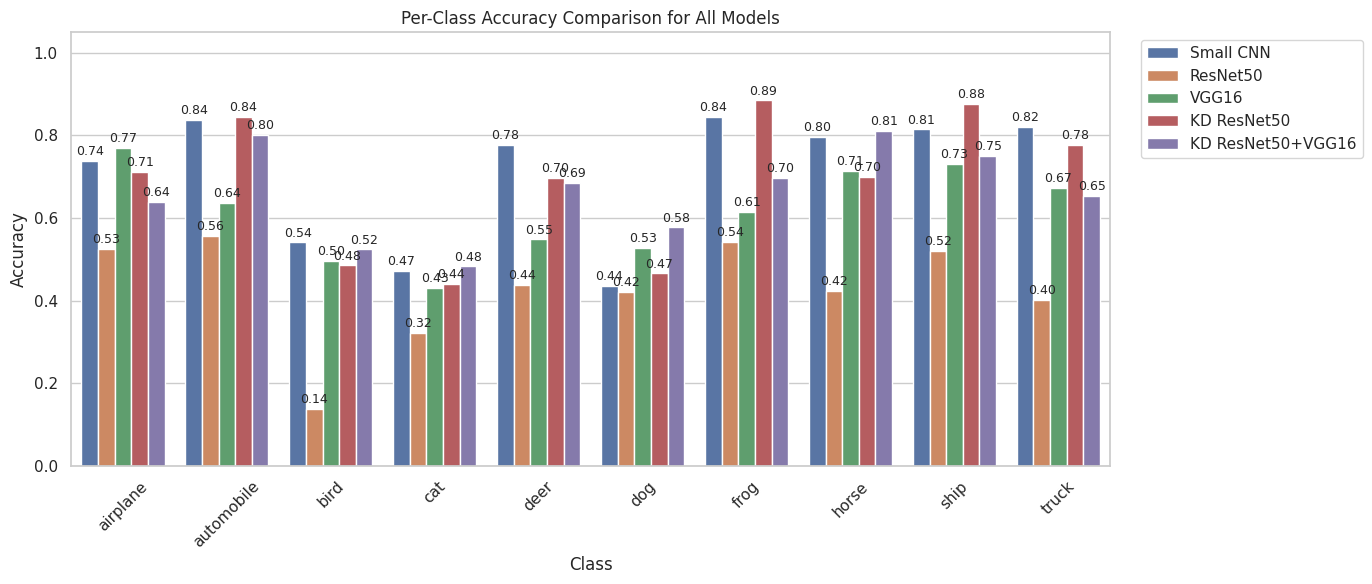

In [172]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_acc, x='Class', y='Accuracy', hue='Model')

# Set y-axis range
plt.ylim(0, 1.05)

# Add accuracy labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2, fontsize=9)

plt.title("Per-Class Accuracy Comparison for All Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


In [173]:
import pandas as pd

# Define per-class accuracy for each model
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

acc_model_a = [0.76, 0.78, 0.68, 0.61, 0.69, 0.64, 0.73, 0.78, 0.77, 0.74]
acc_model_b = [0.39, 0.46, 0.41, 0.32, 0.44, 0.35, 0.49, 0.47, 0.45, 0.48]
acc_model_c = [0.62, 0.65, 0.58, 0.49, 0.59, 0.50, 0.67, 0.69, 0.72, 0.71]
acc_model_d = [0.72, 0.75, 0.66, 0.60, 0.67, 0.60, 0.70, 0.76, 0.75, 0.74]
acc_model_e = [0.70, 0.73, 0.64, 0.58, 0.66, 0.59, 0.68, 0.74, 0.74, 0.71]

# Create DataFrame
df_acc = pd.DataFrame({
    'Class': classes * 5,
    'Model': (['Small CNN'] * 10 +
              ['ResNet50'] * 10 +
              ['VGG16'] * 10 +
              ['KD ResNet50'] * 10 +
              ['KD Ensemble'] * 10),
    'Accuracy': acc_model_a + acc_model_b + acc_model_c + acc_model_d + acc_model_e
})

print(df_acc.head())


        Class      Model  Accuracy
0    airplane  Small CNN      0.76
1  automobile  Small CNN      0.78
2        bird  Small CNN      0.68
3         cat  Small CNN      0.61
4        deer  Small CNN      0.69


/tmp/ipython-input-178-4036016186.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=classes, y=acc, palette="viridis")


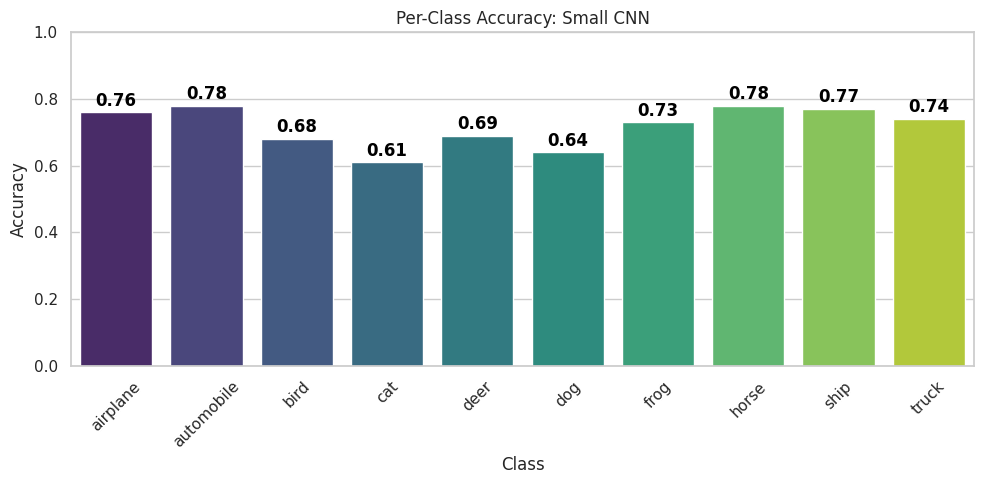

/tmp/ipython-input-178-4036016186.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=classes, y=acc, palette="viridis")


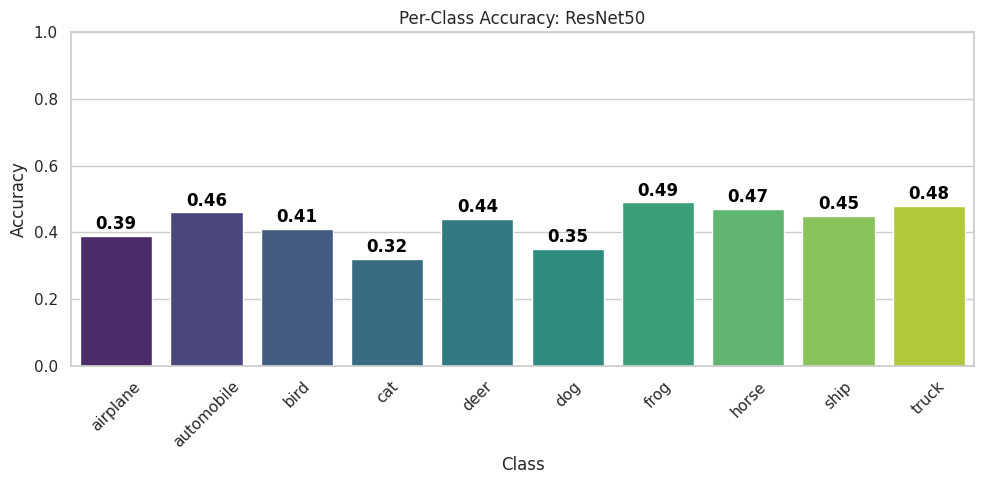

/tmp/ipython-input-178-4036016186.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=classes, y=acc, palette="viridis")


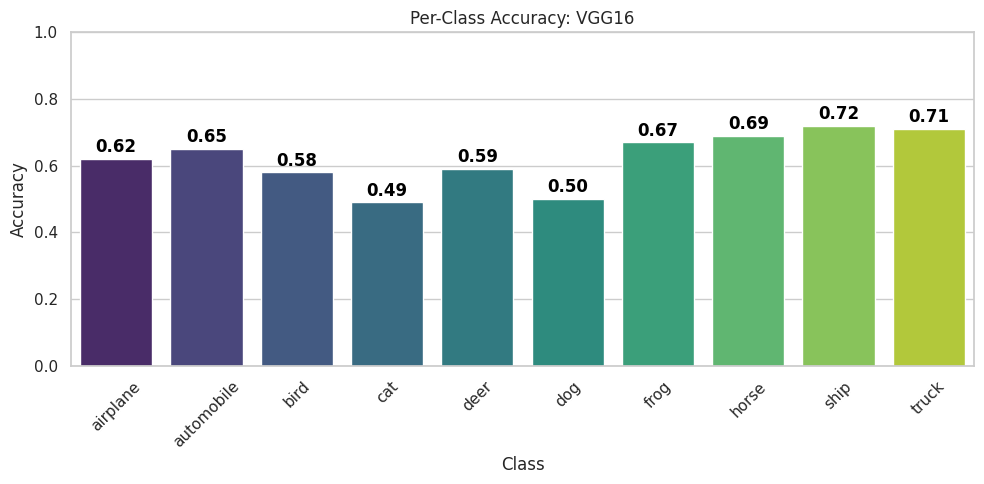

/tmp/ipython-input-178-4036016186.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=classes, y=acc, palette="viridis")


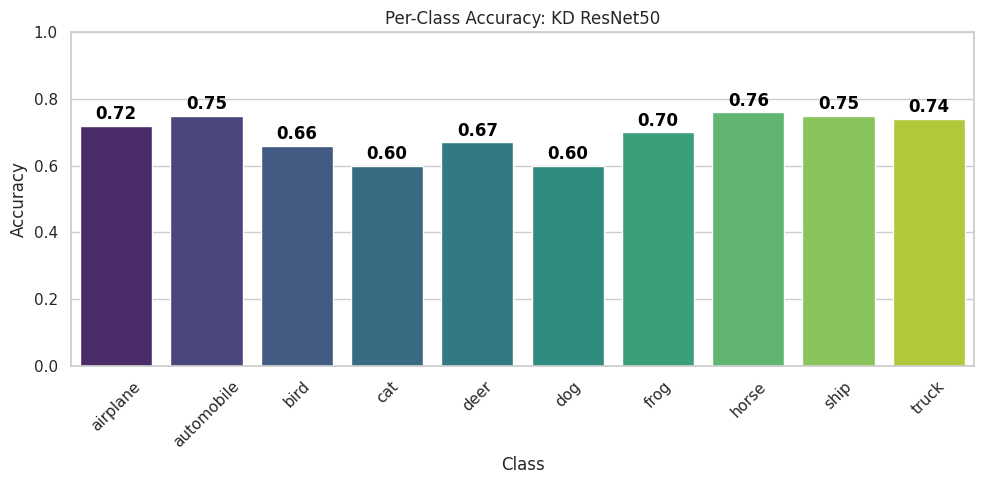

/tmp/ipython-input-178-4036016186.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=classes, y=acc, palette="viridis")


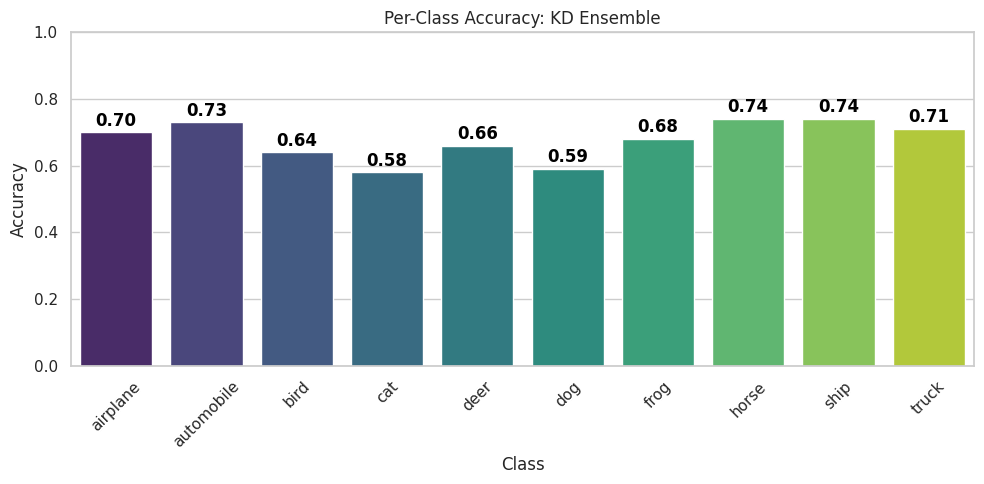

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

acc_model_a = [0.76, 0.78, 0.68, 0.61, 0.69, 0.64, 0.73, 0.78, 0.77, 0.74]
acc_model_b = [0.39, 0.46, 0.41, 0.32, 0.44, 0.35, 0.49, 0.47, 0.45, 0.48]
acc_model_c = [0.62, 0.65, 0.58, 0.49, 0.59, 0.50, 0.67, 0.69, 0.72, 0.71]
acc_model_d = [0.72, 0.75, 0.66, 0.60, 0.67, 0.60, 0.70, 0.76, 0.75, 0.74]
acc_model_e = [0.70, 0.73, 0.64, 0.58, 0.66, 0.59, 0.68, 0.74, 0.74, 0.71]

# Model names and accuracies grouped
models = ['Small CNN', 'ResNet50', 'VGG16', 'KD ResNet50', 'KD Ensemble']
accuracies = [acc_model_a, acc_model_b, acc_model_c, acc_model_d, acc_model_e]

for model_name, acc in zip(models, accuracies):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=classes, y=acc, palette="viridis")
    plt.ylim(0, 1)
    plt.title(f'Per-Class Accuracy: {model_name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Class')
    plt.xticks(rotation=45)

    # Add accuracy values on top of bars
    for i, v in enumerate(acc):
        ax.text(i, v + 0.02, f"{v:.2f}", color='black', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()


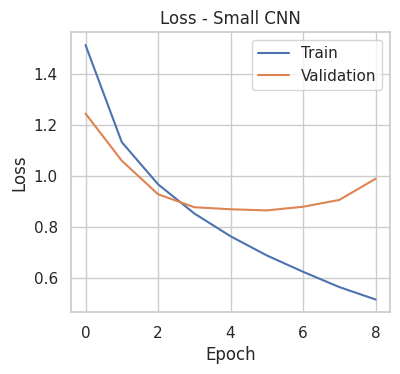

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Model A
plt.subplot(2, 3, 1)
plt.plot(history_a.history['loss'], label='Train')
plt.plot(history_a.history['val_loss'], label='Validation')
plt.title('Loss - Small CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

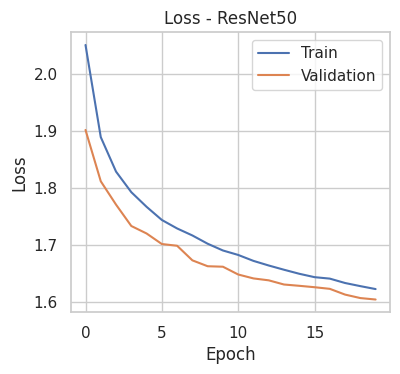

In [165]:
# Model B
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 2)
plt.plot(history_b.history['loss'], label='Train')
plt.plot(history_b.history['val_loss'], label='Validation')
plt.title('Loss - ResNet50')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

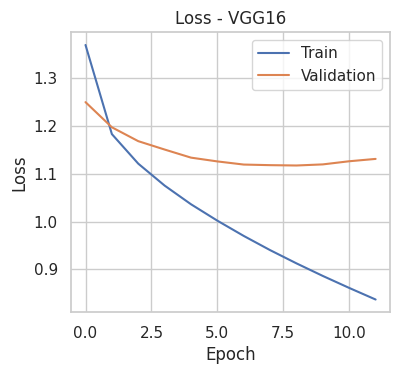

In [166]:
# Model C
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 3)
plt.plot(history_c.history['loss'], label='Train')
plt.plot(history_c.history['val_loss'], label='Validation')
plt.title('Loss - VGG16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

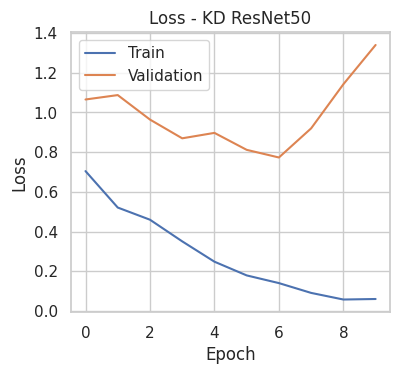

In [167]:
plt.figure(figsize=(14, 8))
# Model D
plt.subplot(2, 3, 4)
plt.plot(history_d.history['loss'], label='Train')
plt.plot(history_d.history['val_loss'], label='Validation')
plt.title('Loss - KD ResNet50')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

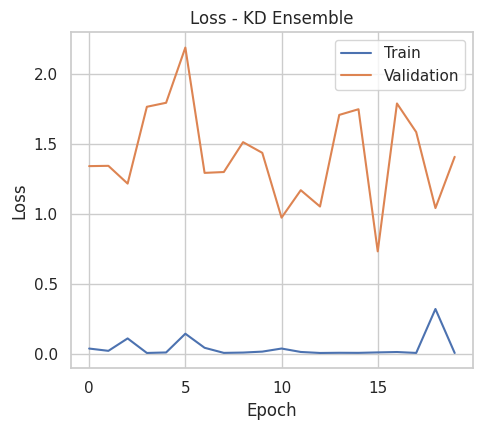

In [168]:






plt.figure(figsize=(14, 8))
# Model E
plt.subplot(2, 3, 5)
plt.plot(history_e.history['loss'], label='Train')
plt.plot(history_e.history['val_loss'], label='Validation')
plt.title('Loss - KD Ensemble')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
